In [1]:
import numpy as np
from scipy.stats import norm
from numpy import cos, pi
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.model_selection import KFold

In [2]:
def fRustrigin(x, n=1, a=10):
    return a*n + sum([x[i]**2-a*cos(2*pi*x[i]) for i in range(n)])

In [6]:
def randomSearch(func, xs, dim=1):
    current = [np.random.random(dim)*10.24-5.12 for _ in range(xs[-1])]
    fr = [fRustrigin(i, n=dim) for i in current]
    return [min(fr[:i]) for i in xs]

In [35]:
def rfOpt(n, dim=5, div=10, random_step=10):
    for i in range(len(n)): n[i] -= random_step
    points = [np.random.random(dim)*10.24-5.12 for _ in range(div)]
    values = [fRustrigin(i, n=dim) for i in points]
    rf = [RandomForestRegressor() for _ in range(div)]
    kf = KFold(n_splits=div)
    for _ in range(n[-1]):
        kf.get_n_splits(points)
        for ens, train_ix in enumerate(kf.split(points)):
            train_ix, _ = train_ix
            rf[ens].fit([points[ix] for ix in train_ix], [values[ix] for ix in train_ix])
        step = [np.random.random(dim)*10.24-5.12 for _ in range(random_step)]
        predicteds = []
        for i in step:
            predicteds.append([j.predict(np.reshape(i,(-1, dim)))[0] for j in rf])
        predicted_means = [np.mean(ix) for ix in predicteds]
        predicted_stds = [np.std(ix) for ix in predicteds]
        pr_m_std = np.mean(predicted_stds)
        point_to_append = step[sorted(enumerate([(predicted_stds[ix]-pr_m_std)/predicted_means[ix]
                                                 for ix in range(random_step)]),
                                      key=lambda x: x[1])[0][0]]
        value_to_append = fRustrigin(point_to_append, n=dim)
        points.append(point_to_append)
        values.append(value_to_append)
    return [min(values[:i]) for i in n]

In [61]:
def gpOpt(n,dim=5, initial=10, random_step=10):
    for i in range(len(n)): n[i] -= random_step
    points = [np.random.random(dim)*10.24-5.12 for _ in range(initial)]
    values = [fRustrigin(i, n=dim) for i in points]
    rf = BayesianRidge()
    for _ in range(n[-1]):
        rf.fit(points, values)
        step = [np.random.random(dim)*10.24-5.12 for _ in range(random_step)]
        mu,sigma = [], []
        for i in step:
            mu0,sigma0 = rf.predict(np.reshape(i,(-1, dim)), return_std=True)
            mu.append(mu0)
            sigma.append(sigma0)
        best = min(values)
        Z = [(best-mu[i]) / sigma[i] if sigma[i]!=0 else 0 for i in range(random_step)]
        ei = [max((best-mu[i]) * norm.cdf(Z)[i] + sigma[i] * norm.pdf(Z)[i]) for i in range(random_step)]
        ei[sigma == 0.0] == 0.0
        ix = np.argmin(ei)
        points.append(step[ix])
        values.append(fRustrigin(points[-1], n=dim))
    return [min(values[:ix]) for ix in n]

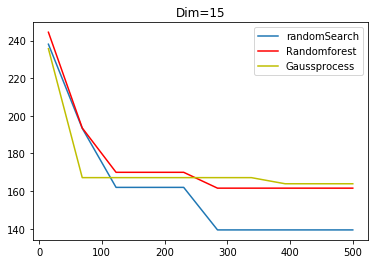

In [53]:
x = np.linspace(15, 500, 10)
y = randomSearch(fRustrigin, [int(i) for i in x], dim=15)
y1 = rfOpt([int(ix) for ix in x], dim=15)
y2 = gpOpt([int(ix) for ix in x], dim=15)
plt.plot(x,y, label='randomSearch')
plt.plot(x, y1,'r', label='Randomforest')
plt.plot(x,y2,'y', label='Gaussprocess')
plt.legend()
plt.title('Dim=15')
plt.show()

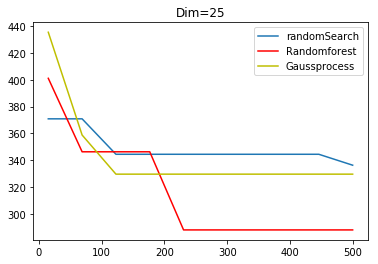

In [54]:
x = np.linspace(15, 500, 10)
y = randomSearch(fRustrigin, [int(i) for i in x], dim=25)
y1 = rfOpt([int(ix) for ix in x], dim=25)
y2 = gpOpt([int(ix) for ix in x], dim=25)
plt.plot(x,y, label='randomSearch')
plt.plot(x, y1,'r', label='Randomforest')
plt.plot(x,y2,'y', label='Gaussprocess')
plt.legend()
plt.title('Dim=25')
plt.show()

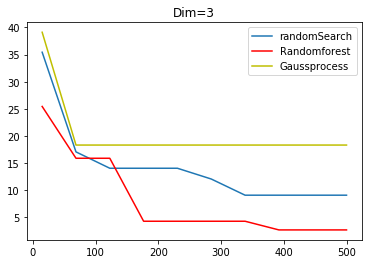

In [58]:
x = np.linspace(15, 500, 10)
y = randomSearch(fRustrigin, [int(i) for i in x], dim=3)
y1 = rfOpt([int(ix) for ix in x], dim=3)
y2 = gpOpt([int(ix) for ix in x], dim=3)
plt.plot(x,y, label='randomSearch')
plt.plot(x, y1,'r', label='Randomforest')
plt.plot(x,y2,'y', label='Gaussprocess')
plt.legend()
plt.title('Dim=3')
plt.show()

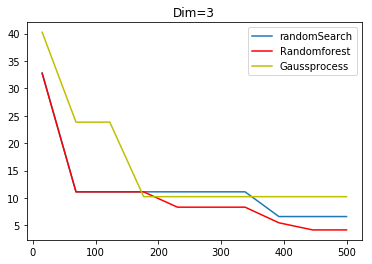

In [62]:
x = np.linspace(15, 500, 10)
y = randomSearch(fRustrigin, [int(i) for i in x], dim=3)
y1 = rfOpt([int(ix) for ix in x], dim=3)
y2 = gpOpt([int(ix) for ix in x], dim=3)
plt.plot(x,y, label='randomSearch')
plt.plot(x, y1,'r', label='Randomforest')
plt.plot(x,y2,'y', label='Gaussprocess')
plt.legend()
plt.title('Dim=3')
plt.show()

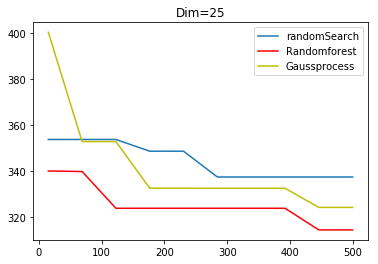

In [60]:
x = np.linspace(15, 500, 10)
y = randomSearch(fRustrigin, [int(i) for i in x], dim=25)
y1 = rfOpt([int(ix) for ix in x], dim=25)
y2 = gpOpt([int(ix) for ix in x], dim=25)
plt.plot(x,y, label='randomSearch')
plt.plot(x, y1,'r', label='Randomforest')
plt.plot(x,y2,'y', label='Gaussprocess')
plt.legend()
plt.title('Dim=25')
plt.show()